In [1]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

low_memory=False
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [0]:
data = pd.read_csv(r'DM_ALUNO.CSV', delimiter='|', encoding='iso-8859-1', usecols=['ID_ALUNO','TP_SEXO','IN_DEFICIENCIA','NU_IDADE','NU_ANO_INGRESSO'])

In [0]:
'''
  Análise do total de pessoas que possuam alguma deficiência
'''

In [156]:
data.shape

(12043993, 5)

In [157]:
data.rename(columns={'ID_ALUNO':'Id','TP_SEXO':'Sexo','NU_IDADE':'Idade','IN_DEFICIENCIA':'Possui_Deficiencia'},inplace=True)
data.sample(10)

,Id,Sexo,Idade,Possui_Deficiencia,NU_ANO_INGRESSO
4823239,C031041AB8D75101CF845C8CC996FA4B,1,25,0,2017
10998014,14723524A2741E4BE4DFC866D1664E7E,2,35,0,2018
9495819,05DA17E6D15363EC5B707B6F753CED5A,1,23,0,2017
9956379,B76F79001E1B721EC65F124F3538A967,1,20,0,2018
7883365,E650F9DD673B1306143FF3C5BB87F03D,2,46,0,2008
11104328,C760992F3A1A7CFD270E772A43F4AB48,2,19,0,2018
4708906,F6CDA08671E96B51D2EA8CC799E98063,1,18,0,2017
10288336,0D9ECFDFFDA7FDABECA9ED8879056C19,1,29,0,2012
3030463,A7E4E33841524F8C7E9EDD455B96A536,1,21,0,2018
1756846,F3BE46389FBB67E87D9DEC81444318D0,2,19,0,2018


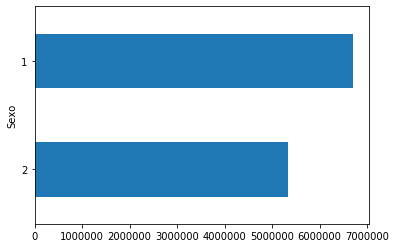

In [158]:
data.groupby('Sexo').size().sort_values().plot(kind='barh')

In [159]:
total = data.query('Possui_Deficiencia == 1')['Id'].count()
f'Quantidade de pessoas com algum tipo de dificiência: {total}'

'Quantidade de pessoas com algum tipo de dificiência: 59496'

In [160]:
mulheres = data.query('Possui_Deficiencia == 1 and Sexo == 1')['Id'].count()
f'Quantidade de mulheres com algum tipo de dificiência: {mulheres}'

'Quantidade de mulheres com algum tipo de dificiência: 28227'

In [161]:
f'Porcentagem de mulheres: {mulheres / total * 100:.2f}%'

'Porcentagem de mulheres: 47.44%'

In [162]:
homens = data.query('Possui_Deficiencia == 1 and Sexo == 2')['Id'].count()
f'Quantidade de homens com algum tipo de dificiência: {homens}'

'Quantidade de homens com algum tipo de dificiência: 31269'

In [163]:
f'Porcentagem de homens: {homens / total * 100:.2f}%'

'Porcentagem de homens: 52.56%'

In [164]:
''' Faixa etária de 18 anos ''' 

mulheres = data.query('Possui_Deficiencia == 1 and Sexo == 1 and Idade == 18')['Id'].count()
f'Quantidade de mulheres: {mulheres}'

'Quantidade de mulheres: 759'

In [165]:
homens = data.query('Possui_Deficiencia == 1 and Sexo == 2 and Idade == 18')['Id'].count()
f'Quantidade de mulheres: {homens}'

'Quantidade de mulheres: 729'

In [166]:
total = data.query('Possui_Deficiencia == 1 and Idade == 18')['Id'].count()
f'Quantidade de mulheres: {total}'

'Quantidade de mulheres: 1488'

In [0]:
'''
  Análise anual: 2016, 2017, 2018
'''

In [167]:
ano_2016 = data.query('NU_ANO_INGRESSO == 2016')['Id'].count()
f'Quantidade: {ano_2016}'

'Quantidade: 1951756'

In [168]:
total = data.query('Possui_Deficiencia == 1 and NU_ANO_INGRESSO == 2016')['Id'].count()
f'Quantidade de pessoas com algum tipo de dificiência: {total}'

'Quantidade de pessoas com algum tipo de dificiência: 9437'

In [169]:
mulheres = data.query('Possui_Deficiencia == 1 and Sexo == 1 and NU_ANO_INGRESSO == 2016')['Id'].count()
f'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: {mulheres}'

'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: 4537'

In [170]:
homens = data.query('Possui_Deficiencia == 1 and Sexo == 2 and NU_ANO_INGRESSO == 2016')['Id'].count()
f'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: {homens}'

'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: 4900'

In [171]:
f'Porcentagem de mulheres: {mulheres / total * 100:.2f}%, Porcentagem de homens: {homens / total * 100:.2f}%'

'Porcentagem de mulheres: 48.08%, Porcentagem de homens: 51.92%'

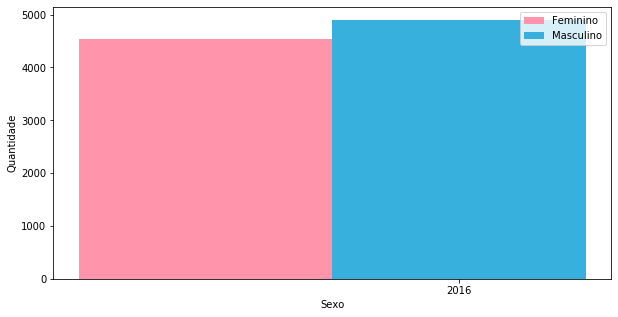

In [172]:
%matplotlib inline

f2016 = [mulheres]
m2016 = [homens]

barWidth = 0.25

plt.figure(figsize=(10,5))

r1 = np.arange(len(f2016))
r2 = [x + barWidth for x in r1]

plt.bar(r1, f2016, color="#ff94ab", width=barWidth, label="Feminino")
plt.bar(r2, m2016, color="#38b0de", width=barWidth, label="Masculino")

plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks([r + barWidth for r in range(len(f2016))], ['2016'])

plt.legend()
plt.savefig('histograma-2016.png')
plt.show()
plt.close()


In [173]:
ano_2017 = data.query('NU_ANO_INGRESSO == 2017')['Id'].count()
f'Quantidade: {ano_2017}'

'Quantidade: 2760159'

In [174]:
total = data.query('Possui_Deficiencia == 1 and NU_ANO_INGRESSO == 2017')['Id'].count()
f'Quantidade de pessoas com algum tipo de dificiência: {total}'

'Quantidade de pessoas com algum tipo de dificiência: 13728'

In [175]:
mulheres = data.query('Possui_Deficiencia == 1 and Sexo == 1 and NU_ANO_INGRESSO == 2017')['Id'].count()
f'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: {mulheres}'

'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: 6389'

In [176]:
homens = data.query('Possui_Deficiencia == 1 and Sexo == 2 and NU_ANO_INGRESSO == 2017')['Id'].count()
f'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: {homens}'

'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: 7339'

In [177]:
f'Porcentagem de mulheres: {mulheres / total * 100:.2f}%, Porcentagem de homens: {homens / total * 100:.2f}%'

'Porcentagem de mulheres: 46.54%, Porcentagem de homens: 53.46%'

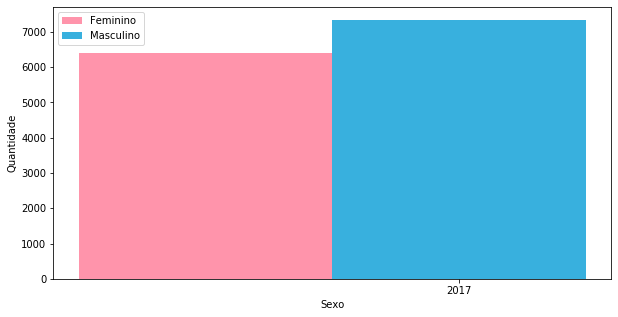

In [178]:
%matplotlib inline

f2017 = [mulheres]
m2017 = [homens]

barWidth = 0.25

plt.figure(figsize=(10,5))

r1 = np.arange(len(f2017))
r2 = [x + barWidth for x in r1]

plt.bar(r1, f2017, color="#ff94ab", width=barWidth, label="Feminino")
plt.bar(r2, m2017, color="#38b0de", width=barWidth, label="Masculino")

plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks([r + barWidth for r in range(len(f2016))], ['2017'])

plt.legend()
plt.savefig('histograma-2017.png')
plt.show()
plt.close()

In [179]:
ano_2018 = data.query('NU_ANO_INGRESSO == 2018')['Id'].count()
f'Quantidade: {ano_2018}'

'Quantidade: 3452617'

In [180]:
total = data.query('Possui_Deficiencia == 1 and NU_ANO_INGRESSO == 2018')['Id'].count()
f'Quantidade de pessoas com algum tipo de dificiência: {total}'

'Quantidade de pessoas com algum tipo de dificiência: 17768'

In [181]:
mulheres = data.query('Possui_Deficiencia == 1 and Sexo == 1 and NU_ANO_INGRESSO == 2018')['Id'].count()
f'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: {mulheres}'

'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: 8344'

In [182]:
homens = data.query('Possui_Deficiencia == 1 and Sexo == 2 and NU_ANO_INGRESSO == 2018')['Id'].count()
f'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: {homens}'

'Quantidade de mulheres com algum tipo de dificiência no ano de 2016: 9424'

In [183]:
f'Porcentagem de mulheres: {mulheres / total * 100:.2f}%, Porcentagem de homens: {homens / total * 100:.2f}%'

'Porcentagem de mulheres: 46.96%, Porcentagem de homens: 53.04%'

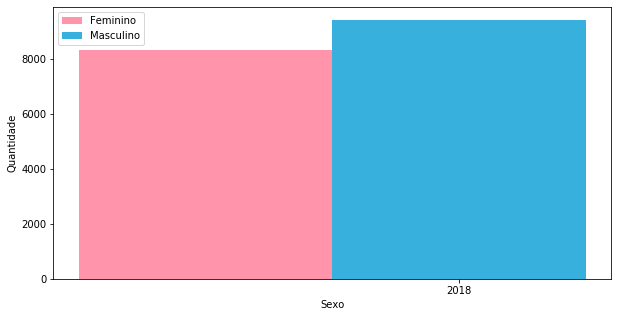

In [184]:
%matplotlib inline

f2018 = [mulheres]
m2018 = [homens]

barWidth = 0.25

plt.figure(figsize=(10,5))

r1 = np.arange(len(f2018))
r2 = [x + barWidth for x in r1]

plt.bar(r1, f2018, color="#ff94ab", width=barWidth, label="Feminino")
plt.bar(r2, m2018, color="#38b0de", width=barWidth, label="Masculino")

plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks([r + barWidth for r in range(len(f2018))], ['2018'])

plt.legend()
plt.savefig('histograma-2018.png')
plt.show()
plt.close()